In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig
import math
import matplotlib.pyplot as plt

In [2]:
h = 0.01
sigma=0.2
r=0.01
E=1
k=2*r/(sigma**2)
T=1
delta=.01
m= int(T/delta)

In [3]:
def fill_matrices(sigma,h,r,N,E):

    L=N*h
    A = np.zeros((N-1,N-1))
 
    diagonal = []
    upper_diag = []
    lower_diag = []
    
    for Si in S:
        temp_diag = -1*sigma**2*Si**2 - r*h**2
        diagonal.append(temp_diag)

    for i in range(N-2):
        lower_temp = 0.5*(sigma**2 * S[i+1]**2 - r * S[i+1]*h)
        upper_temp = 0.5*(sigma**2 * S[i]**2 + r * S[i]*h)
        lower_diag.append(lower_temp)
        upper_diag.append(upper_temp)
    
 
    for i in range(N-2):       
        A[i][i] = diagonal[i]
        A[i][i+1] = upper_diag[i]    
        A[i+1][i] = lower_diag[i]
    
    A[N-2][N-2] = diagonal[N-2]
    
    return A


def d1(S):
    return ((math.log(S/E)+(r)*T)/(sigma*(T**0.5)) + (sigma*(T**0.5))*0.5) 
    
def d2(S):
    return ((math.log(S/E)+(r)*T)/(sigma*(T**0.5)) - (sigma*(T**0.5))*0.5) 
    
def d1new(S):
    return ((math.log(S/E)+(r)*T+math.log(q))/(sigma*(T**0.5)) + (sigma*(T**0.5))*0.5 )

def d2new(S):
    return ((math.log(S/E)+(r)*T+math.log(q))/(sigma*(T**0.5)) - (sigma*(T**0.5))*0.5) 


def g(x):
    return (math.e**(-1*(x**2)/2))/(2*math.pi)**0.5

def integration(z):
    temp=0
    for i in range(1,m):
        temp+= g(i*z/m)
    if z>=5:
        return 1
    else:
        return (0.5 + (z/(2*m))*(g(0)+ g(z)+2*temp))


def rootequation(S,b,c):
    temp=(-S*integration(-b)+E*math.e**(-1*r*T)*integration(-c))
    return(temp)

def relaxation(u0,Tr, cr):
    diff =1
    i=0
    old_u = u0
    while(diff > 10**-7):
        i+=1
        new_u = np.dot(Tr,old_u) + cr
        diff = np.linalg.norm(new_u - old_u,np.inf)
        old_u = new_u
        
    u_star = new_u
    return u_star,i


def optimalweight(M,bdash):
    weight=np.arange(1,2,.05)
    spectral_radius=1
    weightapt=0

    Lnew=np.zeros((N-1,N-1))
    Dnew= np.zeros((N-1,N-1))
    Unew=np.zeros((N-1,N-1))

    for i in range(N-1):
        for j in range (N-1):
            if i==j:
                Dnew[j][j]= M[j][j]
            elif i<j:
                Lnew[j][i]=-1*M[j][i]
            else :
                Unew[j][i]=-1*M[j][i]            

    for i in weight:
        T= np.linalg.inv(Dnew-i*Lnew)@((1-i)*Dnew + i*Unew) 
        w,v=eig(T)
        new_radius=np.absolute(w).max()
        #print(new_radius)
        if new_radius<spectral_radius :
            spectral_radius=new_radius
            weightapt=i
  
    
    T= np.linalg.inv(Dnew-weightapt*Lnew)@((1-weightapt)*Dnew + weightapt*Unew)
    c= np.linalg.inv(Dnew-weightapt*Lnew)@bdash*weightapt


    return spectral_radius,weightapt,T,c


# Up & Out

In [4]:
def barrieroption(type):
    A= fill_matrices(sigma,h,r,N,E)
    I = np.zeros((N-1,N-1))

    for i in range(N-1):
        for j in range(N-1):
            if i==j:
                I[i][j]=1
            else:
                I[i][j]=0
    
    bnew0 = np.zeros((N-1,1))

    solution1=np.zeros((N-1,1))

    for i in range(len(S)):
        solution1[i]=max(E-S[i],0)
        
    
    VB_A = np.zeros(len(S))
    for i in range(len(S)):
        s = S[i]
        if Z>E:
            VB_A[i] = rootequation(s,d1(s),d2(s)) - np.power(Z/s, k-1)*rootequation((Z**2)/s,d1((Z**2)/s),d2((Z**2)/s))
        else:
            VB_A[i] = rootequation(s,d1new(s),d2new(s)) - np.power(Z/s, k-1)*rootequation((Z**2)/s,d1new((Z**2)/s),d2new((Z**2)/s))
        


    for i in range(0,m): 
        if type=='Up&Out':
            bnew0[0]=(-0.5*(sigma**2 * S[0]**2 - r* S[0] * h) *(E*(math.e**(-1*r*(i+1)*delta))))
        else:
            bnew0[0]=0
        bnew0=solution1-(bnew0*delta)/h**2
        x,y,Tr,cr = optimalweight((I-(delta*A)/(h**2)),bnew0)
        solution1,i_GS = relaxation(solution1, Tr, cr)
        bnew0 = np.zeros((N-1,1))


    plt.figure(figsize=(12,9))
    plt.plot(S, solution1,linewidth =4, label='Numerical Solution')
    plt.plot(S,VB_A,linewidth =3, linestyle='dashed',label='Analytical Solution' )
    plt.legend(loc='upper right')
    plt.xlabel('Stock Price')
    plt.ylabel('Put Price')
    plt.title(type+' Barrier Option')


            

Case I: Z<E

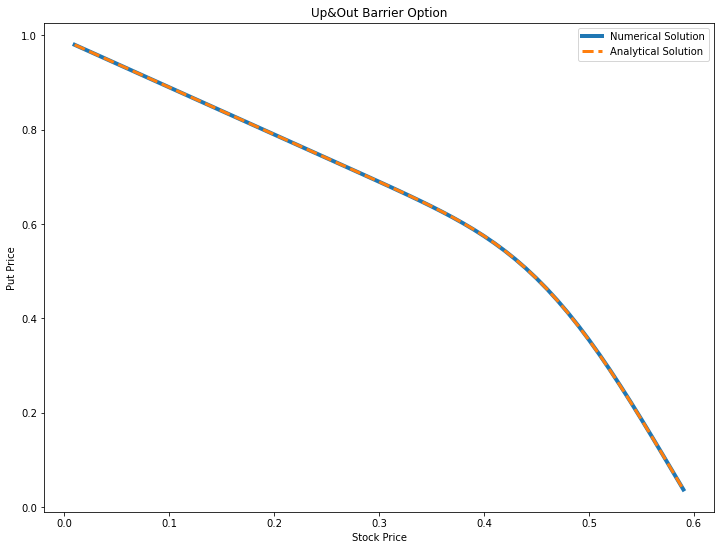

In [5]:
Z=.6
q=E/Z
N=int(Z/h)
S=np.linspace(0.01,Z-h,N-1)
barrieroption('Up&Out')
#barrieroption('Down&Out')

Case II: Z>E

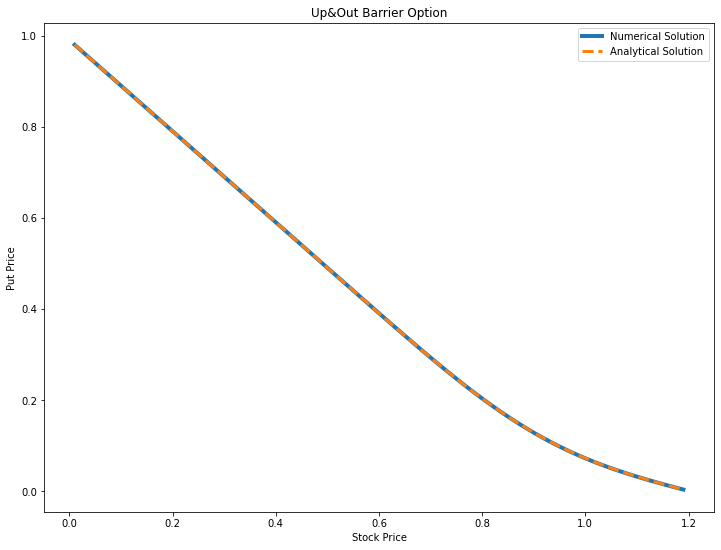

In [6]:
Z=1.2
q=E/Z
N=int(Z/h)
S=np.linspace(0.01,Z-h,N-1)
barrieroption('Up&Out')

# Down & Out

In [7]:
def barrieroption():
    A = fill_matrices(sigma,h,r,N,E)
    I = np.zeros((N-1,N-1))

    for i in range(N-1):
        for j in range(N-1):
            if i==j:
                I[i][j]=1
            else:
                I[i][j]=0
    
    bnew0 = np.zeros((N-1,1))

    solution1=np.zeros((N-1,1))

    for i in range(len(S)):
        solution1[i]=max(E-S[i],0)
        
    
    VB_A = np.zeros(len(S))
    temp = np.zeros(len(S))
    temp2 = np.zeros(len(S))

    for i in range(len(S)):
        s = S[i]
        temp= rootequation(s,d1(s),d2(s)) - rootequation(s,d1new(s),d2new(s))
        temp2= rootequation((Z**2)/s,d1((Z**2)/s),d2((Z**2)/s)) - rootequation((Z**2)/s,d1new((Z**2)/s),d2new((Z**2)/s))
        VB_A[i] = temp - np.power(Z/s, k-1)*temp2        


    for i in range(0,m):
        bnew0=solution1
        x,y,Tr,cr = optimalweight((I-(delta*A)/(h**2)),bnew0)
        solution1,i_GS = relaxation(solution1, Tr, cr)


    plt.figure(figsize=(12,9))
    plt.plot(S,VB_A,linewidth =4, label='Numerical Solution')
    plt.plot(S,VB_A,linewidth =3, linestyle='dashed',label='Analytical Solution' )
    plt.legend(loc='upper right')
    plt.xlabel('Stock Price')
    plt.ylabel('Put Price')
    plt.title(' Down & Out Barrier Option')      

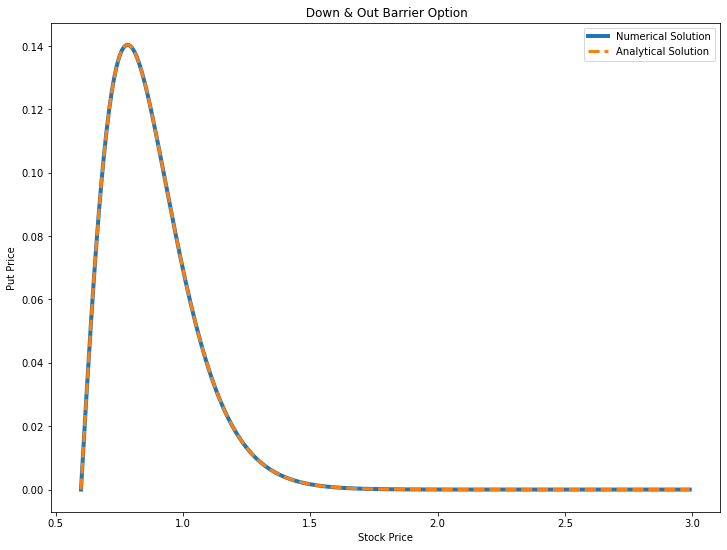

In [8]:
Z=.6
q=E/Z
N = 1025
L=N*h
S=np.arange(Z,L,h)
N=len(S) +1
barrieroption()